In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

In [157]:
#Knn Function
def KNN (X ,Y, Required_point , k  , mode_func ) :
    Distance_List = []                                         # list to append every calculated distance
    m = X.shape[0]                                             # get the size of entry datat
    
    for index  in range(m):
        distance = enclidean_distance(Required_point,X[index]) # calculate the distance of every point 
        Distance_List.append ((distance , Y[index]))           # append in the list
        
    sorted_distance = sorted(Distance_List)                    # sort the calculated distance , to get the smallest 
        
    nearest_distance = sorted_distance[:k]                     # Get the  K number of the nearest calculated Distance 
    nearest_distance = np.array(nearest_distance)              # put in the array form
    
    labels = nearest_distance[:,1]                             # get The nearest Lables
    
    return nearest_distance , mode_func(labels)           

In [158]:
# function use only with regression tasks , it's return the mean of the data
def regression_mode (labels):
    return (sum(labels)/len(labels))

In [159]:
# function use only with classification tasks , it's counts the calculated distance and groub the repeated  , then return the max  group 
def classification_mode (labels):
    uniq_label, counts = np.unique(labels, return_counts=True)   
    pred = uniq_label[counts.argmax()]
    return int(pred)

In [160]:
# Function to calculate the Enclidean Distance 
def enclidean_distance (point1 , point2) :
    dis= np.sum((point1-point2)**2)**0.5
    return dis

In [161]:
data = pd.read_csv("Desktop\\train2.csv") # read Data

In [162]:
data.shape

(42003, 785)

In [163]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [164]:
X = data.iloc[:, 1:].values        # make x = all rows and columns exept the last columns 
Y = data['class'].values

In [165]:
X.shape

(42003, 784)

In [166]:
Y.shape

(42003,)

In [167]:
from sklearn.model_selection import train_test_split    # use to split the data 

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10) # this line split the data to train , and test

###### X_train  represent the input trainig data 
###### X_test   represent the input test data
###### y_train  represent the output trainig data 
###### y_test   represent the output test data  

In [169]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29402, 784)
(12601, 784)
(29402,)
(12601,)


In [170]:
# Funcrion to draw the image 
def plot_image(img):
    plt.imshow(img.reshape(28, 28), cmap="gray")
    plt.show()

In [172]:
_,pred=KNN(X_train, y_train, X_test[1805], k=6, mode_func=classification_mode) # Test The 
pred

3

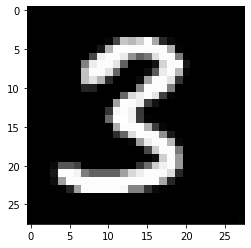

In [173]:
plot_image(X_test[1805]) # check from the Test

In [177]:
# Test Random 100 element from training data and append them in list
predictions = []
for i in range(100):
    _,temp = KNN(X_train, y_train, X_test[i], k=6 , mode_func=classification_mode)
    predictions.append(temp)

In [176]:
# calculate the accuracy of prediction of 100 element 
(y_test[:100] == predictions).sum()/len(predictions)


0.95